In [56]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.13.0


In [57]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS** using the GPU


In [58]:
if tf.test.is_built_with_cuda():
    print("TensorFlow supports CUDA.")
else:
    print("TensorFlow does not support CUDA.")

TensorFlow supports CUDA.


In [59]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.shape

(60000, 28, 28)

In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

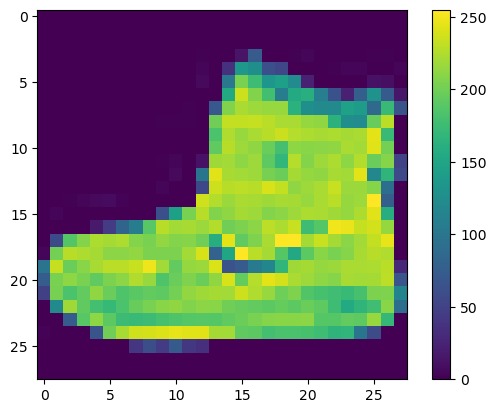

In [35]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [36]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [37]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS** using the GPU


In [53]:
train_images.shape

(60000, 28, 28)

In [38]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [39]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
train_images.shape

(60000, 28, 28)

In [42]:
train_labels.shape

(60000,)

In [43]:
model1.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5025 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3749 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3376 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3095 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2948 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2786 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2563 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2474 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

In [44]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS** using the GPU


In [45]:
# modeli test verkümesi üzerinde deneme 
test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3742 - accuracy: 0.8679 - 368ms/epoch - 1ms/step

Test accuracy: 0.867900013923645


In [46]:
probability_model = tf.keras.Sequential([model1, 
                                         tf.keras.layers.Softmax()])


In [47]:
predictions = probability_model.predict(test_images)


313/313 [==============================] - 0s 606us/step


In [48]:
predictions[0]

array([1.3117426e-05, 7.5289712e-11, 1.3891464e-05, 1.2946741e-10,
       8.9011919e-06, 6.7727233e-04, 2.7370837e-05, 3.3571756e-01,
       9.5073028e-06, 6.6353232e-01], dtype=float32)

In [49]:
np.argmax(predictions[0])

9

In [50]:
test_labels[0]

9

In [51]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


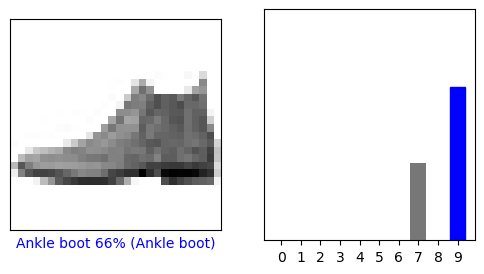

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
